In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import datetime

In [15]:
dataset = pd.read_csv('E-com_Data.csv')
dataset.head(50)

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN
5,4349.0,14618,397122.0,27-10-2017,1.0,12:43:00 PM,256.0,256.0,Location 1,NaN,NaN,NaN
6,4343.0,15364,368432.0,13-02-2017,-4.0,2:46:00 PM,922.0,-3688.0,Location 1,True,NaN,NaN
7,4341.0,85014B,377109.0,14-05-2017,3.0,9:22:00 AM,677.0,2031.0,Location 1,NaN,NaN,NaN
8,4341.0,85014A,377109.0,12-05-2017,3.0,9:22:00 AM,692.0,2076.0,Location 1,NaN,NaN,NaN
9,4341.0,85014B,390217.0,07-09-2017,6.0,2:47:00 PM,670.0,4020.0,Location 1,NaN,NaN,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [6]:
dataset.isnull().sum()/len(dataset)*100

CustomerID            25.304556
Item Code              0.579728
InvoieNo               0.579728
Date of purchase       0.579728
Quantity               0.579728
Time                   0.579728
price per Unit         0.579728
Price                  0.579728
Shipping Location      0.579728
Cancelled_status      98.457817
Reason of return      99.999446
Sold as set          100.000000
dtype: float64

In [7]:
# Find the actual customer details
dataset['CustomerID'].value_counts()

4043.0    7971
1896.0    5874
1301.0    5099
331.0     4615
1675.0    2779
          ... 
2198.0       1
3209.0       1
2251.0       1
3127.0       1
3244.0       1
Name: CustomerID, Length: 4349, dtype: int64

In [10]:
dataset['CustomerID'].nunique()

4349

In [11]:
# Drop non-significant variable
dataset.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [18]:
#dataset.head()

In [19]:
dataset.duplicated().sum()

3145

In [20]:
dataset = dataset.rename(columns={'Date of purchase': 'Date', 'InvoieNo': 'InvoiceNo'})

In [21]:
dataset.columns

Index(['CustomerID', 'Item Code', 'InvoiceNo', 'Date', 'Quantity', 'Time',
       'price per Unit', 'Price', 'Shipping Location', 'Cancelled_status',
       'Reason of return', 'Sold as set'],
      dtype='object')

In [22]:
# remove duplicate data from the actual sheet
dataset = dataset.drop_duplicates(ignore_index = True)

In [23]:
dataset.duplicated().sum()

0

In [24]:
dataset = dataset.drop(['Shipping Location','Cancelled_status', 'Reason of return', 'Sold as set', 'Time','Item Code',
                 'Quantity','Time', 'price per Unit'], axis=1)

In [25]:
dataset.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [26]:
dataset.isnull().sum()

CustomerID    133790
InvoiceNo          1
Date               1
Price              1
dtype: int64

In [27]:
dataset = dataset.dropna(subset=['CustomerID'])

In [28]:
dataset.isnull().sum()

CustomerID    0
InvoiceNo     0
Date          0
Price         0
dtype: int64

In [29]:
dataset['Date1'] = dataset['Date']

In [30]:
dataset.head()

,CustomerID,InvoiceNo,Date,Price,Date1
0,4355.0,398177.0,29-10-2017,1926.0,29-10-2017
1,4352.0,394422.0,05-10-2017,1740.0,05-10-2017
2,4352.0,394422.0,12-10-2017,1866.0,12-10-2017
3,4352.0,388633.0,22-08-2017,1869.0,22-08-2017
4,4352.0,394422.0,10-10-2017,1888.0,10-10-2017


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537940
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CustomerID  404181 non-null  float64       
 1   InvoiceNo   404181 non-null  float64       
 2   Date        404181 non-null  datetime64[ns]
 3   Price       404181 non-null  float64       
 4   Date1       404181 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3)
memory usage: 18.5 MB


In [33]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date1'] = pd.to_datetime(dataset['Date1'])

In [35]:
dataset['Date'].describe()

count                  404181
unique                    381
top       2017-11-24 00:00:00
freq                     2522
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [36]:
New_date = datetime.datetime(2017, 12, 20)

In [37]:
New_date

datetime.datetime(2017, 12, 20, 0, 0)

In [38]:
RFMScore = dataset.groupby('CustomerID').agg({'Date' : lambda x : (New_date - x.max()).days,
                                             'Date1' : lambda x : x.count(),
                                             'Price' : lambda x : x.sum()})

RFMScore['Date1'] = RFMScore['Date1'].astype(int)
# rename the variable
RFMScore.rename(columns = {'Date': 'Recency', 'Date1': 'Frequency', 'Price':'Monetory'}, inplace=True)

In [40]:
RFMScore.reset_index().head(10)

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,20,72,176613.0
3,5.0,18,16,41976.0
4,6.0,9,84,151822.0
5,7.0,208,4,9410.0
6,8.0,234,58,135550.0
7,9.0,15,13,65832.0
8,10.0,16,58,331601.0
9,11.0,9,131,771439.0


In [41]:
RFMScore.Recency.describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

In [42]:
RFMScore.Frequency.describe()

count    4349.000000
mean       92.936537
std       232.086935
min         1.000000
25%        17.000000
50%        42.000000
75%       101.000000
max      7970.000000
Name: Frequency, dtype: float64

In [43]:
RFMScore.Monetory.describe()

count    4.349000e+03
mean     2.299380e+05
std      8.572589e+05
min     -5.037200e+04
25%      3.814800e+04
50%      8.365500e+04
75%      2.056120e+05
max      3.553619e+07
Name: Monetory, dtype: float64

In [44]:
# Split into four segment to identify customer details basis quantile method

quantiles = RFMScore.quantile(q=[0.25, 0.50, 0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [45]:
def RScore(x, p, d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4
    
def FnMScore(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.5]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

In [47]:
RFMScore.columns

Index(['Recency', 'Frequency', 'Monetory'], dtype='object')

In [50]:
RFMScore['R'] = RFMScore['Recency'].apply(RScore, args=('Recency',quantiles))
RFMScore['F'] = RFMScore['Frequency'].apply(FnMScore, args=('Frequency',quantiles))
RFMScore['M'] = RFMScore['Monetory'].apply(FnMScore, args=('Monetory',quantiles))

In [51]:
RFMScore

,Recency,Frequency,Monetory,R,F,M
CustomerID,,,,,,
2.0,4,182,553704.0,1,1,1
3.0,77,27,257404.0,4,3,1
4.0,20,72,176613.0,3,2,2
5.0,18,16,41976.0,2,4,3
6.0,9,84,151822.0,1,2,2
...,...,...,...,...,...,...
4368.0,17,10,20480.0,2,4,4
4369.0,181,7,10774.0,4,4,4
4370.0,12,13,24962.0,2,4,4


In [52]:
RFMScore.reset_index().head()

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,2.0,4,182,553704.0,1,1,1
1,3.0,77,27,257404.0,4,3,1
2,4.0,20,72,176613.0,3,2,2
3,5.0,18,16,41976.0,2,4,3
4,6.0,9,84,151822.0,1,2,2


In [53]:
RFMScore['RFMGroup'] = RFMScore.R.map(str) + RFMScore.F.map(str) +  RFMScore.M.map(str)
RFMScore['RFMScore'] = RFMScore[['R','F','M']].sum(axis=1)
RFMScore.head(20)

,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
2.0,4,182,553704.0,1,1,1,111,3
3.0,77,27,257404.0,4,3,1,431,8
4.0,20,72,176613.0,3,2,2,322,7
5.0,18,16,41976.0,2,4,3,243,9
6.0,9,84,151822.0,1,2,2,122,5
7.0,208,4,9410.0,4,4,4,444,12
8.0,234,58,135550.0,4,2,2,422,8
9.0,15,13,65832.0,2,4,3,243,9
10.0,16,58,331601.0,2,2,1,221,5


In [54]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore
0,2.0,4,182,553704.0,1,1,1,111,3
1,3.0,77,27,257404.0,4,3,1,431,8
2,4.0,20,72,176613.0,3,2,2,322,7
3,5.0,18,16,41976.0,2,4,3,243,9
4,6.0,9,84,151822.0,1,2,2,122,5
...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,244,10
4345,4369.0,181,7,10774.0,4,4,4,444,12
4346,4370.0,12,13,24962.0,2,4,4,244,10
4347,4371.0,4,754,280608.0,1,1,1,111,3


In [55]:
# Categorize the customer basis RFM Points

Loyality_Level = ['Prime', 'Diamond','Gold','Platinum']
score_cuts = pd.qcut(RFMScore.RFMScore, q=4, labels=Loyality_Level)
RFMScore['Loyality_Level'] = score_cuts.values
RFMScore = RFMScore.reset_index()
RFMScore

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore,Loyality_Level
0,2.0,4,182,553704.0,1,1,1,111,3,Prime
1,3.0,77,27,257404.0,4,3,1,431,8,Diamond
2,4.0,20,72,176613.0,3,2,2,322,7,Diamond
3,5.0,18,16,41976.0,2,4,3,243,9,Gold
4,6.0,9,84,151822.0,1,2,2,122,5,Prime
...,...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,244,10,Gold
4345,4369.0,181,7,10774.0,4,4,4,444,12,Platinum
4346,4370.0,12,13,24962.0,2,4,4,244,10,Gold
4347,4371.0,4,754,280608.0,1,1,1,111,3,Prime


In [56]:
RFMScore.to_csv("customer_segmentation.csv")

In [57]:
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\Learnbay 8.30-12\\Real Time Project\\E-Com'

In [58]:
# Create new dataset
RFMScore1 = RFMScore.iloc[:,1:4]
RFMScore1.head()

,Recency,Frequency,Monetory
0,4,182,553704.0
1,77,27,257404.0
2,20,72,176613.0
3,18,16,41976.0
4,9,84,151822.0


In [60]:
# Feateure Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(RFMScore1)
scaled_data

array([[-0.64079551,  0.38379456,  0.3777193 ],
       [ 0.17351282, -0.28413542,  0.03204302],
       [-0.46231697, -0.09022026, -0.06221123],
       ...,
       [-0.55155624, -0.34446458, -0.23913379],
       [-0.64079551,  2.84867167,  0.0591138 ],
       [-0.1165148 , -0.09883872,  0.03836156]])

In [61]:
scaled_data = pd.DataFrame(scaled_data, index=RFMScore1.index, columns=RFMScore1.columns)

In [62]:
scaled_data

,Recency,Frequency,Monetory
0,-0.640796,0.383795,0.377719
1,0.173513,-0.284135,0.032043
2,-0.462317,-0.090220,-0.062211
3,-0.484627,-0.331537,-0.219285
4,-0.585021,-0.038510,-0.091133
...,...,...,...
4344,-0.495782,-0.357392,-0.244363
4345,1.333623,-0.370320,-0.255686
4346,-0.551556,-0.344465,-0.239134
4347,-0.640796,2.848672,0.059114


# Building K-Means Cluster 

In [63]:
from sklearn.cluster import KMeans

In [66]:
wcss = []

for i in range(2,15):
    km = KMeans(n_clusters=i, init='k-means++',max_iter=1000, random_state=101 )
    km.fit(scaled_data)
    wcss.append(km.inertia_)

In [67]:
wcss

[9013.070458558639,
 5554.762804279887,
 4352.874044718689,
 3389.0355253753496,
 2480.4220700705882,
 1975.0286299101124,
 1704.4738635516564,
 1509.527630755899,
 1343.9122186969787,
 1127.841503804719,
 994.9402546320955,
 865.2725252410025,
 767.124694341703]

In [68]:
abc = [1,2,3,4,5,6,7,8,9,10,11,12,13]

<AxesSubplot:>

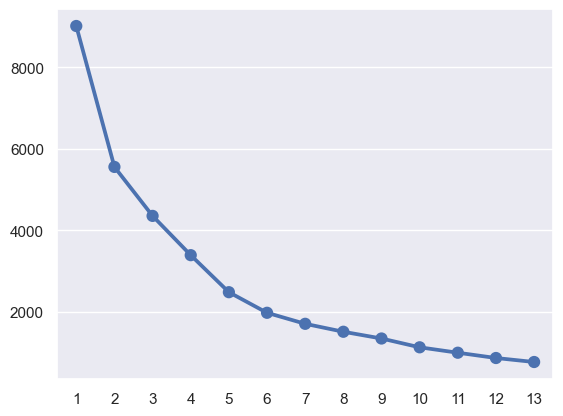

In [69]:
sns.pointplot(abc, wcss)

In [70]:
km = KMeans(n_clusters=5, init='k-means++',max_iter=1000, random_state=101 )
y_kmeans = km.fit_predict(scaled_data)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
RFMScore['Cluster'] = km.labels_

In [73]:
RFMScore.tail(20)

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore,Loyality_Level,Cluster
4329,4353.0,25,42,274078.0,3,3,1,331,7,Diamond,0
4330,4354.0,49,140,328510.0,3,1,1,311,5,Prime,0
4331,4355.0,50,21,39209.0,3,3,3,333,9,Gold,0
4332,4356.0,142,13,21484.0,4,4,4,444,12,Platinum,1
4333,4357.0,13,62,199329.0,2,2,2,222,6,Diamond,0
4334,4358.0,13,46,97001.0,2,2,2,222,6,Diamond,0
4335,4359.0,226,2,96.0,4,4,4,444,12,Platinum,1
4336,4360.0,366,8,18444.0,4,4,4,444,12,Platinum,1
4337,4361.0,39,12,29440.0,3,4,4,344,11,Platinum,0
4338,4362.0,3,170,413270.0,1,1,1,111,3,Prime,0


In [74]:
RFMScore.to_csv("kmeans_cluseter.csv")

In [75]:
# Define customer details basis Loyality_Level

final_details = RFMScore.groupby('Loyality_Level')[['Recency','Frequency', 'Monetory','CustomerID']].agg({
    'Recency':'mean', 'Frequency' : 'mean', 'Monetory': 'mean', 'CustomerID':'nunique'
    
}).reset_index()

In [ ]:
final_details

In [76]:
RFMScore1['Cluster'] = km.labels_

In [78]:
RFMScore1.to_csv("kmeans_cluseter1.csv")